In [90]:
import tensorflow as tf
import numpy as np

In [2]:
!wget https://github.com/avadesh02/Sanskrit-letter-dataset/raw/master/dev_letter_D.p

--2023-03-22 16:06:08--  https://github.com/avadesh02/Sanskrit-letter-dataset/raw/master/dev_letter_D.p
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/avadesh02/Sanskrit-letter-dataset/master/dev_letter_D.p [following]
--2023-03-22 16:06:08--  https://raw.githubusercontent.com/avadesh02/Sanskrit-letter-dataset/master/dev_letter_D.p
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80598908 (77M) [text/plain]
Saving to: ‘dev_letter_D.p’

dev_letter_D.p      100%[===================>]  76.86M   296MB/s    in 0.3s    

2023-03-22 16:06:12 (296 MB/s) - ‘dev_letter_D.p’ saved [80598908/80598908]



In [223]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [4]:
db = pickle.load(open("dev_letter_D.p","rb"),encoding = "ISO-8859-1")

In [194]:
df = pd.DataFrame(db,columns=["images","classes","labels"])

In [198]:
X = np.array(df['images'].tolist())


In [296]:
label_encoder = LabelEncoder().fit(np.unique(df["labels"]))
y = label_encoder.fit_transform(df["labels"].tolist())
num_classes=602
y = tf.keras.utils.to_categorical(y,num_classes=num_classes)


In [441]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [442]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(602, activation='softmax')
])

In [443]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [444]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
193/193 [==============================] - 4s 11ms/step - loss: 5.9563 - accuracy: 0.0777 - val_loss: 4.6927 - val_accuracy: 0.1862
Epoch 2/10
193/193 [==============================] - 1s 7ms/step - loss: 4.1341 - accuracy: 0.2500 - val_loss: 3.7774 - val_accuracy: 0.3173
Epoch 3/10
193/193 [==============================] - 1s 6ms/step - loss: 3.2222 - accuracy: 0.3895 - val_loss: 3.1956 - val_accuracy: 0.4471
Epoch 4/10
193/193 [==============================] - 1s 6ms/step - loss: 2.5891 - accuracy: 0.4938 - val_loss: 2.9043 - val_accuracy: 0.5308
Epoch 5/10
193/193 [==============================] - 1s 7ms/step - loss: 2.0992 - accuracy: 0.5757 - val_loss: 2.8209 - val_accuracy: 0.5620
Epoch 6/10
193/193 [==============================] - 2s 8ms/step - loss: 1.7346 - accuracy: 0.6416 - val_loss: 2.5965 - val_accuracy: 0.5957
Epoch 7/10
193/193 [==============================] - 1s 7ms/step - loss: 1.4379 - accuracy: 0.6828 - val_loss: 2.6426 - val_accuracy: 0.6314
Epoch

In [448]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)


193/193 [==============================] - 0s 2ms/step


In [450]:
from sklearn.metrics import classification_report
print('----------------------------for training---------------------------')
print(classification_report(y_train.argmax(axis=1), y_pred_train.argmax(axis=1)))

print('----------------------------for testing---------------------------')
print(classification_report(y_test.argmax(axis=1), y_pred_test.argmax(axis=1)))


----------------------------for training---------------------------
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        37
           1       0.66      0.72      0.69       247
           2       0.40      0.50      0.44         4
           3       0.83      0.50      0.62        10
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.70      0.58      0.64        12
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
          10       0.75      0.86      0.80        14
          11       0.00      0.00      0.00         1
          12       0.62      0.89      0.73         9
          13       1.00      0.25      0.40         8
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

In [446]:
# y_pred_index = y_pred.argmax(axis=1)
# y_true_index = y_test.argmax(axis=1)

In [357]:
# cm = confusion_matrix(y_true_index,y_pred_index)

In [455]:
label_index = 555 # label for which to plot confusion matrix

In [462]:
mask = y_test.argmax(axis=1) == label_index
y_true_index = y_test[mask].argmax(axis=1)
y_pred_index = y_pred_test[mask].argmax(axis=1)


In [463]:
class_name = label_encoder.inverse_transform(y_true_index)
print(class_name)

['va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va'
 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va'
 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va'
 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va'
 'va' 'va' 'va' 'va' 'va' 'va' 'va' 'va']


In [464]:
cm = np.zeros((2, 2))

In [465]:
cm[0, 0] = np.sum((y_true_index == label_index) & (y_pred_index == label_index))  # true positive
cm[0, 1] = np.sum((y_true_index == label_index) & (y_pred_index != label_index))  # false negative
cm[1, 0] = np.sum((y_true_index != label_index) & (y_pred_index == label_index))  # false positive
cm[1, 1] = np.sum((y_true_index != label_index) & (y_pred_index != label_index))  # true negative


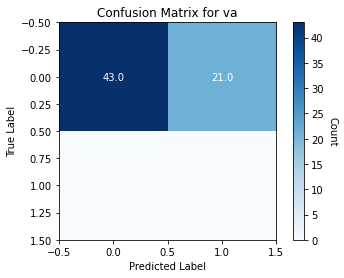

In [466]:
fig, ax = plt.subplots()
im = ax.imshow(cm,cmap='Blues')


ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')


# Add the values to each cell
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="w")

# Add a color bar to show the scale of the values
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Count', rotation=-90, va="bottom")

# Add a title
if class_name is not None:
  ax.set_title(f'Confusion Matrix for {class_name[-1]}')

plt.show()

